In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('heart_data.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
data.columns.tolist()

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

# Data Dictionary
1-Age: age of the patient [years]

2-Sex: sex of the patient [M: Male, F: Female]

3-ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4-RestingBP: resting blood pressure [mm Hg]

5-Cholesterol: serum cholesterol [mm/dl]

6-FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7-RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8-MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

9-ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

10-Oldpeak: oldpeak = ST [Numeric value measured in depression]

11-ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12-HeartDisease: output class [1: heart disease, 0: Normal]

# Categorical Feature to examine

In [7]:
categorical_vars = data.describe(include=["object"])
categorical_vars

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


 # Categorical Feature to Visualization

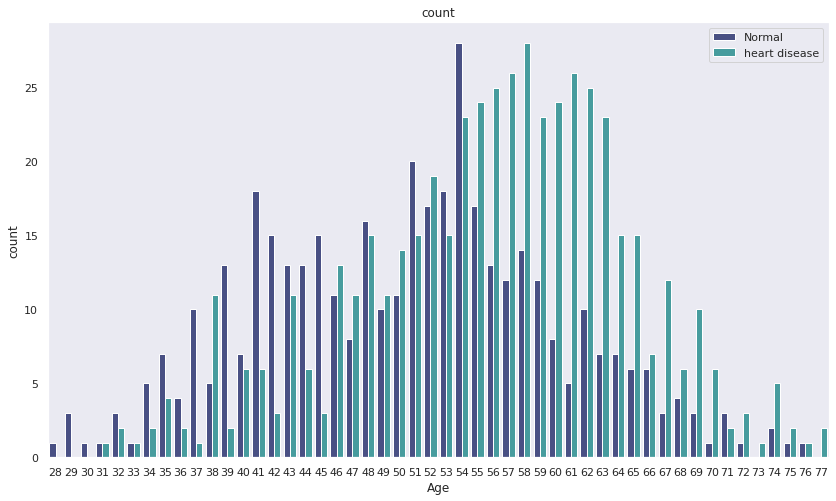

In [8]:
plt.figure(figsize=(14,8))
sns.set(style='dark')
sns.countplot(x=data['Age'],palette = "mako",hue=data['HeartDisease']);
plt.legend(['Normal', 'heart disease'],loc='upper right')
plt.title('count');

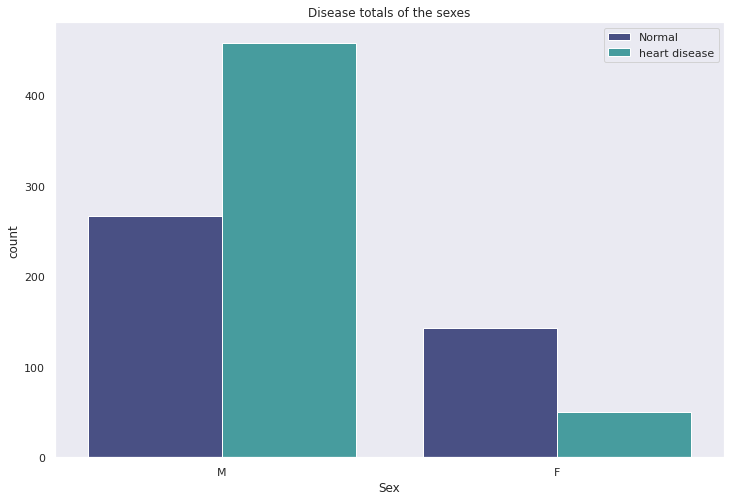

In [9]:
plt.figure(figsize=(12,8))
plt.title('Disease totals of the sexes')
sns.countplot(x="Sex",hue="HeartDisease", data=data,palette="mako")
plt.legend(['Normal', 'heart disease']);

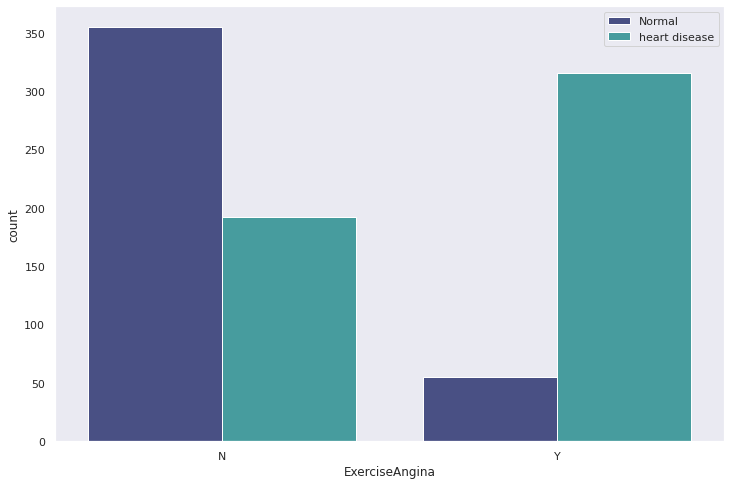

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x="ExerciseAngina",hue="HeartDisease", data=data,palette="mako",)
plt.legend(['Normal', 'heart disease']);

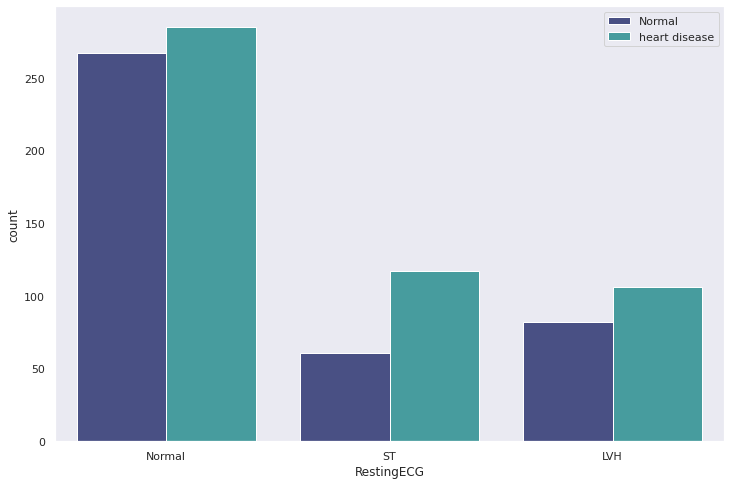

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x="RestingECG",hue="HeartDisease", data=data,palette="mako")
plt.legend(['Normal', 'heart disease']);

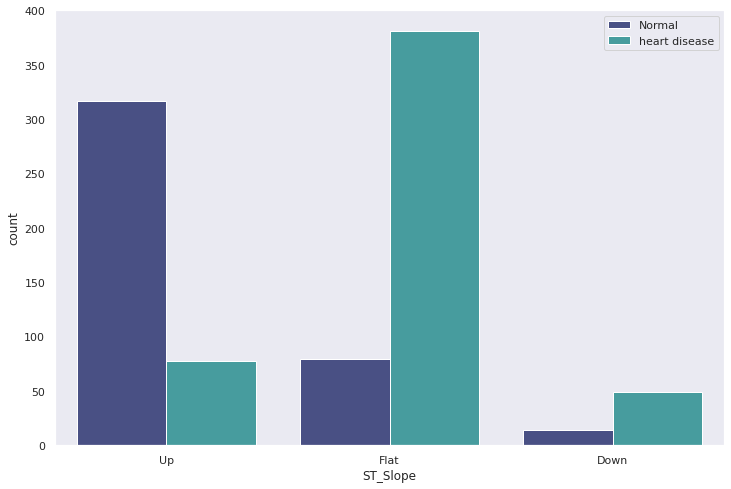

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x="ST_Slope",hue="HeartDisease", data=data,palette="mako")
plt.legend(['Normal', 'heart disease']);

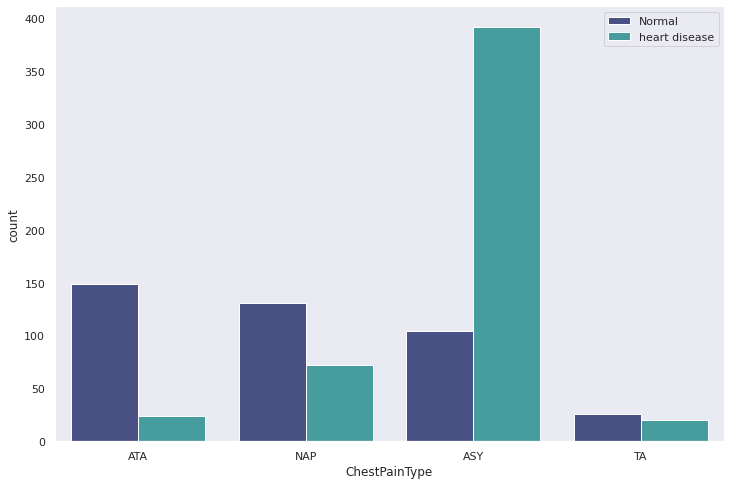

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x="ChestPainType",hue="HeartDisease", data=data,palette="mako")
plt.legend(['Normal', 'heart disease']);

# Numerical Data

In [14]:
data_num_cols = data.select_dtypes(include=np.number)
data_num_cols.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [15]:
data_num_cols = data_num_cols.groupby('Age').mean()
data_num_cols.reset_index()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,28,130.000000,132.000000,0.000000,185.000000,0.000000,0.000000
1,29,130.000000,236.666667,0.000000,177.333333,0.000000,0.000000
2,30,170.000000,237.000000,0.000000,170.000000,0.000000,0.000000
3,31,110.000000,244.500000,0.000000,151.500000,0.750000,0.500000
4,32,110.600000,241.200000,0.200000,152.200000,0.140000,0.400000
5,33,110.000000,272.000000,0.000000,167.500000,0.500000,0.500000
6,34,124.142857,163.285714,0.142857,172.571429,0.128571,0.285714
7,35,126.272727,197.454545,0.090909,158.909091,0.372727,0.363636
8,36,123.666667,190.333333,0.166667,166.500000,0.833333,0.333333
9,37,127.090909,233.727273,0.000000,152.909091,0.545455,0.090909


In [16]:
normal = (data.loc[data.HeartDisease==0])
heart_disease = (data.loc[data.HeartDisease==1])

In [17]:
normal_people = normal.groupby('Age').mean()
normal_people.drop(['HeartDisease'],axis=1,inplace=True)
normal_people.reset_index().head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,28,130.000000,132.000000,0.0,185.000000,0.0
1,29,130.000000,236.666667,0.0,177.333333,0.0
2,30,170.000000,237.000000,0.0,170.000000,0.0
3,31,100.000000,219.000000,0.0,150.000000,0.0
4,32,113.333333,225.666667,0.0,168.000000,0.0


In [18]:
heart_disease_people = heart_disease.groupby('Age').mean()
heart_disease_people.drop(['HeartDisease'],axis=1,inplace=True)
heart_disease_people.reset_index().head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,31,120.0,270.00,0.00,153.0,1.50
1,32,106.5,264.50,0.50,128.5,0.35
2,33,100.0,246.00,0.00,150.0,1.00
3,34,127.5,78.00,0.50,167.0,0.10
4,35,119.0,184.25,0.25,139.0,0.70


# Numerical Data Visualization

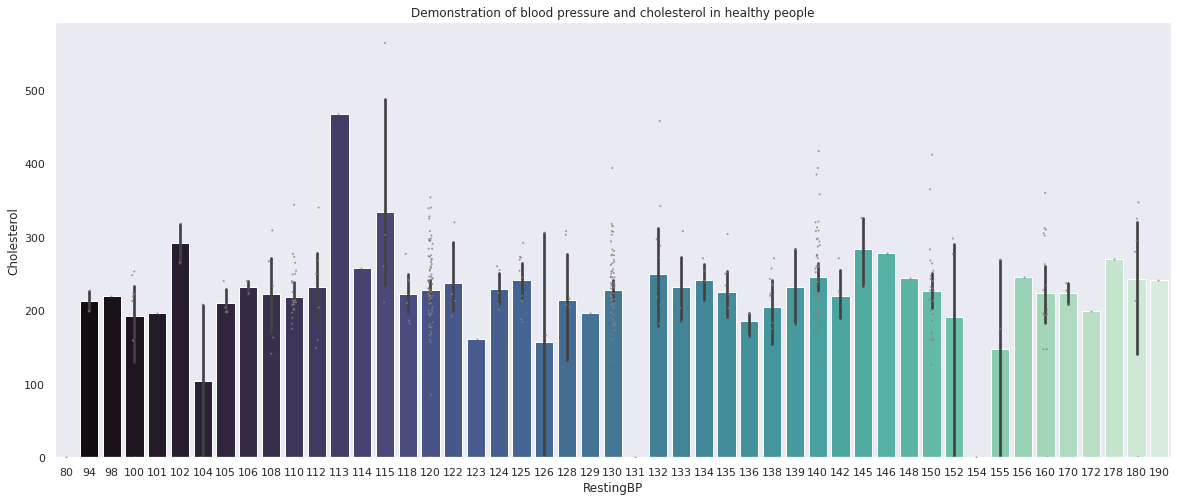

In [19]:
plt.figure(figsize=(20,8))
sns.barplot(x='RestingBP',y='Cholesterol',data=normal, palette='mako')
sns.stripplot(x='RestingBP',y="Cholesterol",data=normal, dodge='True', color='grey', alpha=.8, s=2)
plt.title("Demonstration of blood pressure and cholesterol in healthy people");

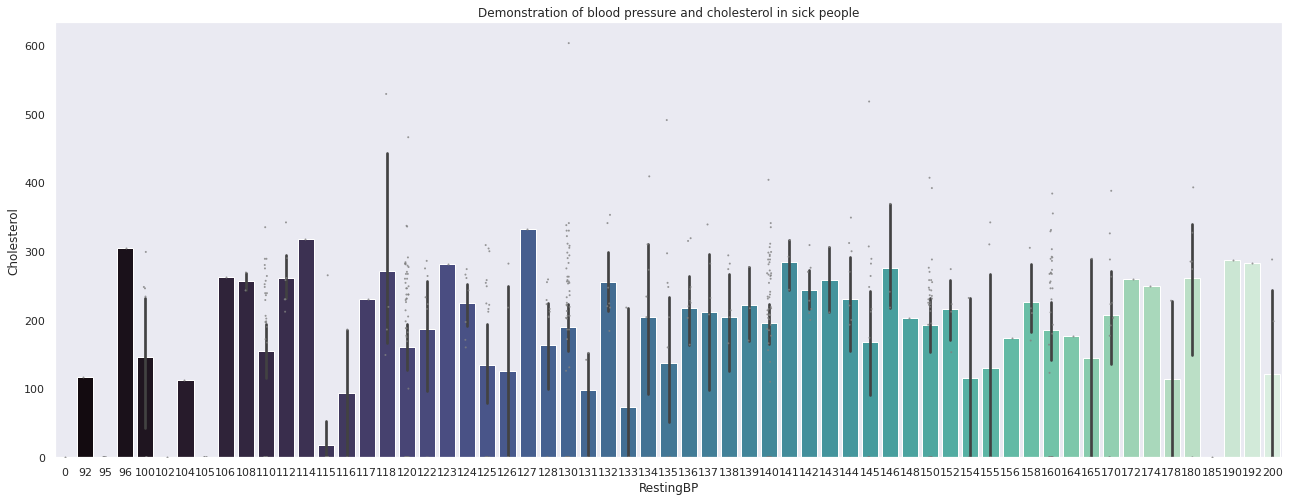

In [20]:
plt.figure(figsize=(22,8))
sns.barplot(x='RestingBP',y='Cholesterol',data=heart_disease, palette='mako')
sns.stripplot(x='RestingBP',y="Cholesterol",data=heart_disease, dodge='True', color='grey', alpha=.8, s=2)
plt.title("Demonstration of blood pressure and cholesterol in sick people");

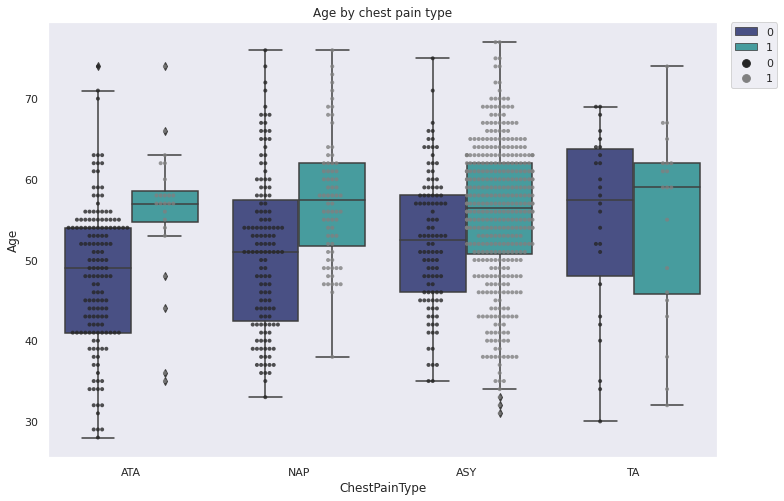

In [21]:
plt.figure(figsize=(12,8))
plt.title("Age by chest pain type")
sns.boxplot(x='ChestPainType',y='Age',hue='HeartDisease',data=data, palette='mako')
sns.swarmplot(x='ChestPainType',y='Age',hue='HeartDisease', dodge=True,data=data, alpha=.8,color='grey',s=4)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

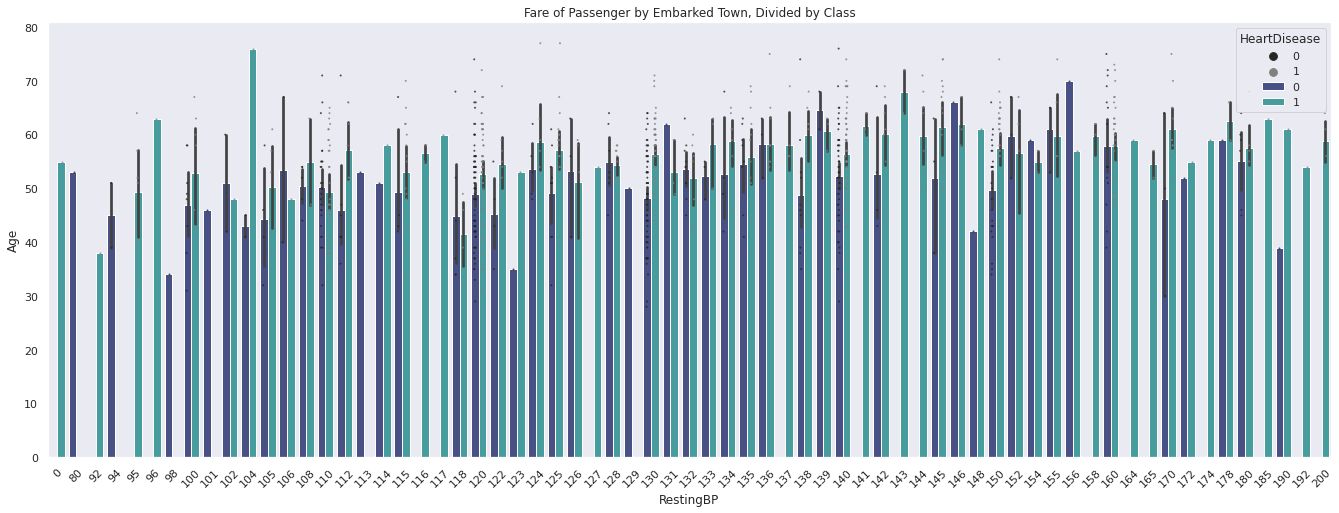

In [22]:
plt.figure(figsize=(23,8))
sns.barplot(x='RestingBP',y='Age',data=data, palette='mako', hue='HeartDisease')
sns.stripplot(x='RestingBP',y="Age",data=data, hue='HeartDisease', dodge='True', color='grey', alpha=.8, s=2)
plt.xticks(rotation=45)
plt.title("Fare of Passenger by Embarked Town, Divided by Class");

# Data Preparation

In [23]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [24]:
lbe=preprocessing.LabelEncoder()
data["ExerciseAngina"]=lbe.fit_transform(data["ExerciseAngina"])
data["Sex"]=lbe.fit_transform(data["Sex"])
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [25]:
dms = pd.get_dummies(data[['ChestPainType', 'RestingECG', 'ST_Slope']]).astype('float64')
y= data['HeartDisease']
X_ = data.drop(['ChestPainType', 'RestingECG', 'ST_Slope','HeartDisease'], axis=1)
X = pd.concat([X_,dms],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Logistic Regression

In [26]:
lr_model=LogisticRegression(solver="liblinear").fit(X_train,y_train)
y_pred= lr_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8652173913043478

In [27]:
print('Test Error : ',cross_val_score(lr_model,X_test,y_test,cv = 10).mean())
print('Train Error: ',cross_val_score(lr_model,X_train,y_train,cv = 10).mean())

Test Error :  0.8652173913043478
Train Error:  0.8706095481670928


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230



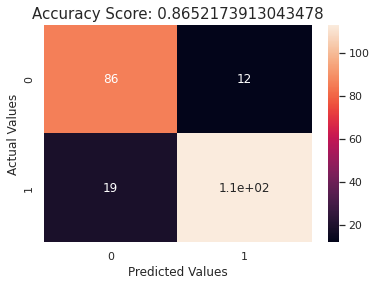

In [29]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred)), size = 15)
plt.show()

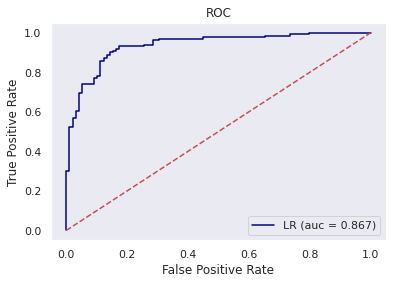

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, lr_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='LR (auc = %0.3f)' % roc_auc, color='navy')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes

In [31]:
nb_model= GaussianNB().fit(X_train,y_train)
nb_predictions=nb_model.predict(X_test)
train_score=accuracy_score(y_test,nb_predictions)
train_score

0.8608695652173913

In [32]:
print('Test Error : ',cross_val_score(nb_model,X_test,y_test,cv = 10).mean())
print('Train Error: ',cross_val_score(nb_model,X_train,y_train,cv = 10).mean())

Test Error :  0.8478260869565217
Train Error:  0.857459505541347


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230



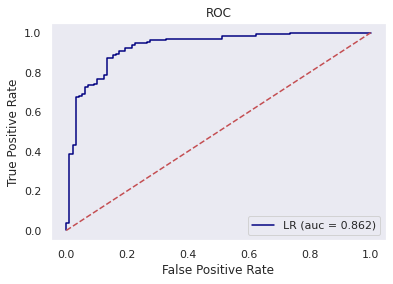

In [34]:
roc_auc = roc_auc_score(y_test, nb_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='LR (auc = %0.3f)' % roc_auc, color='navy')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine(SVM)

In [35]:
#Model - Predict
svm_model = SVC(kernel = 'linear').fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8608695652173913

In [36]:
y_pred = svm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8608695652173913

In [37]:
print('Test Error : ',cross_val_score(svm_model,X_test,y_test,cv = 10).mean())
print('Train Error: ',cross_val_score(svm_model,X_train,y_train,cv = 10).mean())

Test Error :  0.8565217391304347
Train Error:  0.864769820971867


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        98
           1       0.90      0.85      0.88       132

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



In [39]:
# Model Tuned
svc = SVC()
svm_params = {"C": np.arange(1,10), "kernel": ["linear","rbf"]}

In [40]:
svm_cv_model = GridSearchCV(svc,svm_params,cv=5).fit(X_train,y_train)

In [41]:
svm_cv_model.best_params_

{'C': 4, 'kernel': 'linear'}

In [42]:
svm_cv_model.best_score_

0.8633132338940019

In [43]:
svm_tuned = SVC(C= 4,kernel = 'linear').fit(X_train,y_train)
y_pred = svm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.8608695652173913

# KNN

In [44]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7217391304347827

In [45]:
print('Test Error : ',cross_val_score(knn_model,X_test,y_test,cv = 5).mean())
print('Train Error: ',cross_val_score(knn_model,X_train,y_train,cv = 5).mean())

Test Error :  0.734782608695652
Train Error:  0.6874114037871576


In [46]:
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': np.arange(1,50)}
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [47]:
knn_cv_model.best_params_

{'n_neighbors': 38}

In [48]:
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

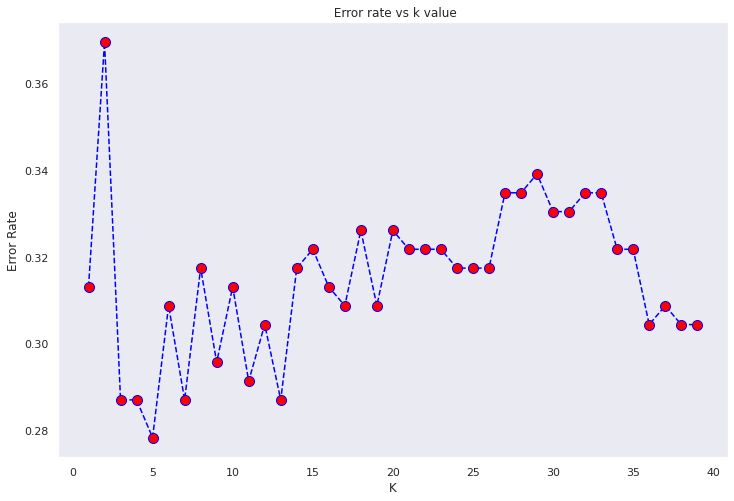

In [49]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate,color='blue',marker='o',linestyle='dashed',markerfacecolor='red',markersize=10)
plt.title(' Error rate vs k value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [50]:
knn_cv_model.best_score_

0.7252344416027281

In [51]:
# Final Model
knn_tuned = KNeighborsClassifier(n_neighbors=38).fit(X_train,y_train)

In [52]:
y_pred = knn_tuned.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred)

0.6956521739130435

# RESULT

In [54]:
modeller = [knn_tuned,svm_tuned,nb_model,lr_model]

sonuc = []
sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

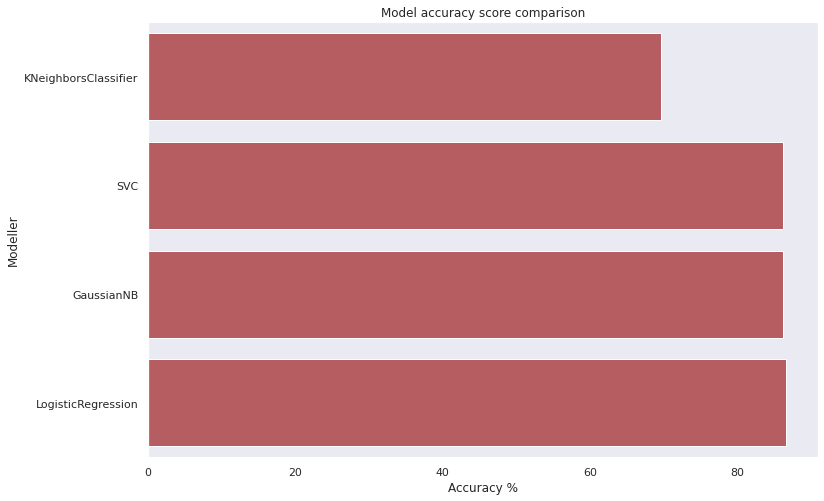

In [55]:
plt.figure(figsize=(12,8))
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Model accuracy score comparison');